<a href="https://colab.research.google.com/github/15gsaavedra/DDDS-My-Projects/blob/main/GS_Spotify_Description_for_Students_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title

# Project 4: Music Popularity Prediction


This project will take data features collected for songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. The popularity of the song will be predicted using a tree-based regression model trained on these features.



The goals for the project are:

- Minimize the cross-validated ***root mean squared error ( RMSE )*** when predicting the popularity of a new song.

- Determine the importance of the features in driving the regression result.
The project will be done using tree-based regression techniques as covered in class. The hyperparameters of the trees should be carefully selected to avoid over-fitting.


There are three main challenges for this project:

1. Determining the outcome ( i.e. target ).  There is a "popularity" column.  But other columns may or may not be more appropriate indicators of popularity.

1. Choosing appropriate predictors ( i.e. features ). When building a machine learning model, we want to make sure that we consider how the model will be ultimately used. For this project, we are predicting the popularity of a new song. Therefore, we should only include the predictors we would have for a new song. It might help to imagine that the song will not be released for several weeks.

1. Data cleaning and feature engineering. Some creative cleaning and/or feature engineering may be needed to extract useful information for prediction.



Once again, be sure to go through the whole data science process and document as such in your Jupyter notebook.

The data is available AWS at https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv .



## Problem Definition


This was a supervised (regression or classification) problem depending on target choice and interpretation.

The goal is to use a tree based model to predict a song's future popularity prior to the song's release.

## Data Collection/Sources


In [1]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: 3SY66RMKrkOWqlNmrITJqgB35oZimRvsMH3ksRsat0cyhpilDUA2mWJYHssNJWG79TSQ+Fdlz/zqMAtJXCNszqN5gXmCjEuG89fhVyV2FPg=
x-amz-request-id: 5T1KX823BCK68YQ7
Date: Tue, 08 Jul 2025 13:50:48 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Content-Length: 738124
Server: AmazonS3



In [2]:
!curl -s -O {url}

In [3]:
ls -la

total 740
drwxr-xr-x 1 root root   4096 Jul  8 13:50 ./
drwxr-xr-x 1 root root   4096 Jul  8 13:49 ../
drwxr-xr-x 4 root root   4096 Jul  4 13:34 .config/
drwxr-xr-x 1 root root   4096 Jul  4 13:34 sample_data/
-rw-r--r-- 1 root root 738124 Jul  8 13:50 Spotify.csv


In [4]:
!head -1 Spotify.csv | tr , '\n' | cat -n

     1	Index
     2	Highest Charting Position
     3	Number of Times Charted
     4	Week of Highest Charting
     5	Song Name
     6	Streams
     7	Artist
     8	Artist Followers
     9	Song ID
    10	Genre
    11	Release Date
    12	Weeks Charted
    13	Popularity
    14	Danceability
    15	Energy
    16	Loudness
    17	Speechiness
    18	Acousticness
    19	Liveness
    20	Tempo
    21	Duration (ms)
    22	Valence
    23	Chord


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import pickle

In [6]:
spotify = pd.read_csv(url)
spotify

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [7]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [8]:
spotify.describe(include = 'all')

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
count,1556.000000,1556.000000,1556.000000,1556,1556,1556,1556,1556,1556,1556,...,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556
unique,NaN,NaN,NaN,83,1556,1556,716,600,1517,395,...,530,575,1394,772,965,606,1461,1486,732,13
top,NaN,NaN,NaN,2019-12-27--2020-01-03,Lover (Remix) [feat. Shawn Mendes],"4,595,450",Taylor Swift,42227614,,[],...,,,,0.102,,0.103,,,,C#/Db
freq,NaN,NaN,NaN,89,1,1,52,52,11,75,...,11,11,11,15,11,23,11,11,11,214
mean,778.500000,87.744216,10.668380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,449.322824,58.147225,16.360546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,389.750000,37.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,778.500000,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1167.250000,137.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning


In [9]:
spotify.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [10]:
# Drop information that isn't plannable for unreleased songs as well as unique identifiers.
collectable = spotify.drop(columns = ['Index', 'Highest Charting Position', 'Number of Times Charted',
                                      'Week of Highest Charting', 'Streams', 'Song ID' ,'Weeks Charted'])
collectable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Song Name         1556 non-null   object
 1   Artist            1556 non-null   object
 2   Artist Followers  1556 non-null   object
 3   Genre             1556 non-null   object
 4   Release Date      1556 non-null   object
 5   Popularity        1556 non-null   object
 6   Danceability      1556 non-null   object
 7   Energy            1556 non-null   object
 8   Loudness          1556 non-null   object
 9   Speechiness       1556 non-null   object
 10  Acousticness      1556 non-null   object
 11  Liveness          1556 non-null   object
 12  Tempo             1556 non-null   object
 13  Duration (ms)     1556 non-null   object
 14  Valence           1556 non-null   object
 15  Chord             1556 non-null   object
dtypes: object(16)
memory usage: 194.6+ KB


In [11]:
collectable.describe(include = 'all')

,Song Name,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
count,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556
unique,1556,716,600,395,478,70,530,575,1394,772,965,606,1461,1486,732,13
top,Lover (Remix) [feat. Shawn Mendes],Taylor Swift,42227614,[],2020-01-17,75,,,,0.102,,0.103,,,,C#/Db
freq,1,52,52,75,34,67,11,11,11,15,11,23,11,11,11,214


In [12]:
collectable['Popularity'].value_counts(dropna=False)

,count
Popularity,
75,67
76,66
72,64
77,62
80,58
...,...
46,1
36,1
34,1


In [13]:
collectable['Artist'].value_counts(dropna=False)

,count
Artist,
Taylor Swift,52
Justin Bieber,32
Lil Uzi Vert,32
Juice WRLD,30
Pop Smoke,29
...,...
Pamungkas,1
BANNERS,1
Robin Schulz,1


In [14]:
collectable.head(10)

,Song Name,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,Beggin',Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,STAY (with Justin Bieber),The Kid LAROI,2230022,['australian hip hop'],2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,good 4 u,Olivia Rodrigo,6266514,['pop'],2021-05-21,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,Bad Habits,Ed Sheeran,83293380,"['pop', 'uk pop']",2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
5,MONTERO (Call Me By Your Name),Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",2021-03-31,97,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab
6,Kiss Me More (feat. SZA),Doja Cat,8640063,"['dance pop', 'pop']",2021-04-09,94,0.762,0.701,-3.541,0.0286,0.235,0.123,110.968,208867,0.742,G#/Ab
7,Todo De Ti,Rauw Alejandro,6080597,"['puerto rican pop', 'trap latino']",2021-05-20,95,0.78,0.718,-3.605,0.0506,0.31,0.0932,127.949,199604,0.342,D#/Eb
8,Yonaguni,Bad Bunny,36142273,"['latin', 'reggaeton', 'trap latino']",2021-06-04,96,0.644,0.648,-4.601,0.118,0.276,0.135,179.951,206710,0.44,C#/Db
9,I WANNA BE YOUR SLAVE,Måneskin,3377762,"['indie rock italiano', 'italian pop']",2021-03-19,95,0.75,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347,0.958,C#/Db


In [15]:
# Drop the features that don't look like they'll easily convert to numerical values.
convenient = collectable.drop(columns = ['Song Name', 'Artist', 'Genre', 'Release Date', 'Chord'])

In [16]:
convenient

,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,3377762,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589
1,2230022,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478
2,6266514,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688
3,83293380,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591
4,5473565,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894
...,...,...,...,...,...,...,...,...,...,...,...
1551,27167675,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608
1552,15019109,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714
1553,22698747,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394
1554,208630,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881


In [17]:
numerical = convenient.apply(pd.to_numeric, errors='coerce')

In [18]:
numerical.head()

,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,3377762.0,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589
1,2230022.0,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478
2,6266514.0,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688
3,83293380.0,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591
4,5473565.0,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894


In [19]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Followers  1545 non-null   float64
 1   Popularity        1545 non-null   float64
 2   Danceability      1545 non-null   float64
 3   Energy            1545 non-null   float64
 4   Loudness          1545 non-null   float64
 5   Speechiness       1545 non-null   float64
 6   Acousticness      1545 non-null   float64
 7   Liveness          1545 non-null   float64
 8   Tempo             1545 non-null   float64
 9   Duration (ms)     1545 non-null   float64
 10  Valence           1545 non-null   float64
dtypes: float64(11)
memory usage: 133.8 KB


In [20]:
numerical.dropna(inplace = True)

## Exploratory Data Analysis


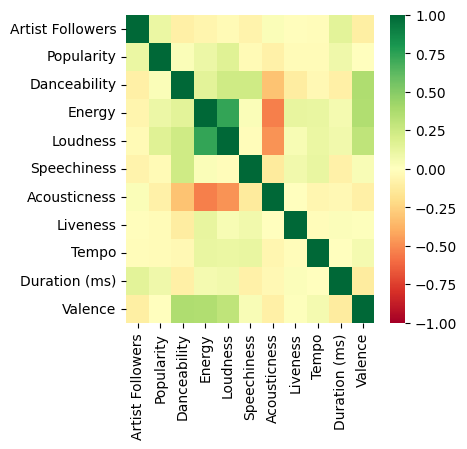

In [21]:
# Try a correlation matrix in case it acts as a good representation of feature importance.
corr = numerical.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr, cmap='RdYlGn',annot = False, vmin = -1);

Correlation matrix didn't seem like a good representation of feature importance.

In [22]:
X = numerical.drop('Popularity', axis = 1)
y = numerical['Popularity']

In [23]:
# two parameters - n_estimators (number of trees), max_depth (number of splits)
numLoops = 500

mean_error = np.zeros(numLoops)

# np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 10 ) #n_estimators is number of trees in forest. Note: you can also choose max_depth for RFs
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )

print(f'RMSE: {np.sqrt(mean_error).mean()}')
print(f'RMSE_std: {np.sqrt(mean_error).std()}')
np.sqrt(mean_error)[:50]

RMSE: 11.137554992447042
RMSE_std: 0.7336521313436548


array([11.94362161, 10.98700763, 11.46078017, 11.16871063, 11.62988005,
       11.73803521, 10.34514254, 11.39506508, 10.61954414, 10.74014337,
       11.49908225, 12.14888624, 10.40976172, 12.44922763, 10.03868891,
        9.85972488, 11.83082065,  9.83571287, 10.2337787 , 13.91637298,
       11.25581491, 10.75045269, 12.13625028, 10.88579134, 10.19719804,
       10.60043658, 12.42153626, 11.34890041, 10.31617812, 11.1538694 ,
       11.431418  , 12.050851  , 11.00049866, 11.56696417, 11.39893965,
       10.76942814, 10.41995379, 11.69942465, 10.92057972, 11.75696447,
       10.95640671, 11.10524236, 10.77479079, 10.28062085, 12.45865005,
       12.07566222, 11.35864155, 11.55763943, 10.56088834, 10.86386934])

In [24]:
# Try random forrest models with different tree numbers to find which gets the best crossvalidated RMSE.
num_trees = range(10,60,10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()

10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


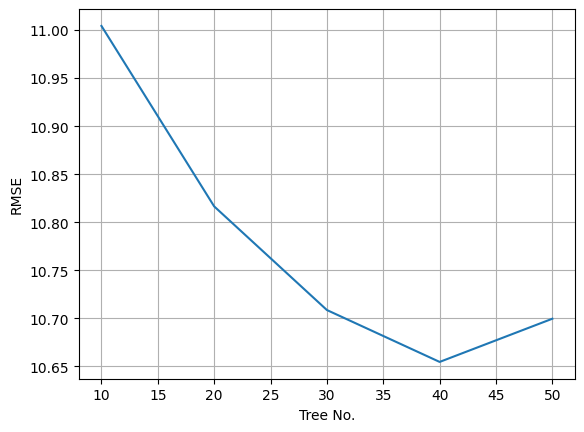

In [25]:
pickle.dump(rfModel, open('rfModel.p','wb'))
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()

In [26]:
print(f'RMSE with 40 trees: {rmse_results[3]}')

RMSE with 40 trees: 10.654735525743764


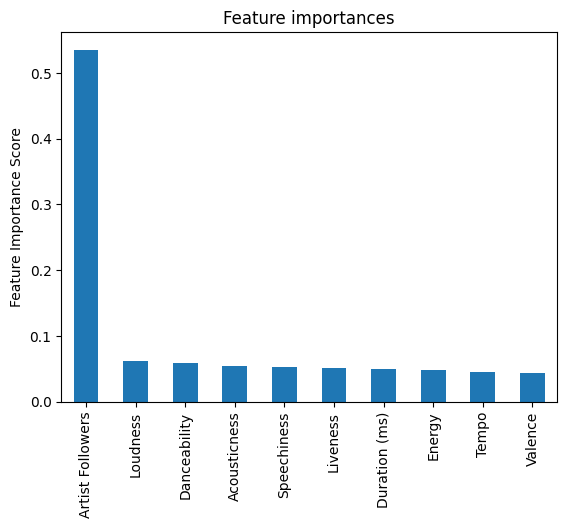

In [27]:
# Create a representation of feature importance.
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;

## Processing



In [28]:
numerical.columns

Index(['Artist Followers', 'Popularity', 'Danceability', 'Energy', 'Loudness',
       'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)',
       'Valence'],
      dtype='object')

In [29]:
drop_art = numerical.drop(columns = 'Artist Followers')
drop_dan = numerical.drop(columns = 'Danceability')
drop_ene = numerical.drop(columns = 'Energy')
drop_lou = numerical.drop(columns = 'Loudness')
drop_spe = numerical.drop(columns = 'Speechiness')
drop_aco = numerical.drop(columns = 'Acousticness')
drop_liv = numerical.drop(columns = 'Liveness')
drop_tem = numerical.drop(columns = 'Tempo')
drop_dur = numerical.drop(columns = 'Duration (ms)')
drop_val = numerical.drop(columns = 'Valence')

In [30]:
alternatives = [drop_art,drop_dan,drop_ene,drop_lou,drop_spe,drop_aco,drop_liv,drop_tem,drop_dur,drop_val]

In [31]:
# Iterate through random forrest models of alternative data frames to find which features can be safely dropped.
num_trees = 40
cv_loops = 100
rmse_results = np.zeros(1)
std_results = np.zeros(1)


for n in alternatives:
  X = n.drop('Popularity', axis = 1)
  y = n['Popularity']
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=40 )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  rmse_results[0] = rmse_cv.mean()
  print(f'rmse = {rmse_results[0]}')


rmse = 16.346568901655022
rmse = 10.813129891324671
rmse = 10.627045302414816
rmse = 10.63186403530304
rmse = 10.66881638341068
rmse = 10.690511468850378
rmse = 10.622869321248922
rmse = 10.660673606834155
rmse = 10.646536040655931
rmse = 10.698822044156705


In [32]:
more_drops = numerical.drop(columns = ['Energy', 'Loudness', 'Liveness','Duration (ms)'])

In [33]:

X = more_drops.drop('Popularity', axis = 1)
y = more_drops['Popularity']

num_trees = range(30,55,5)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()


30  trees finished.
35  trees finished.
40  trees finished.
45  trees finished.
50  trees finished.


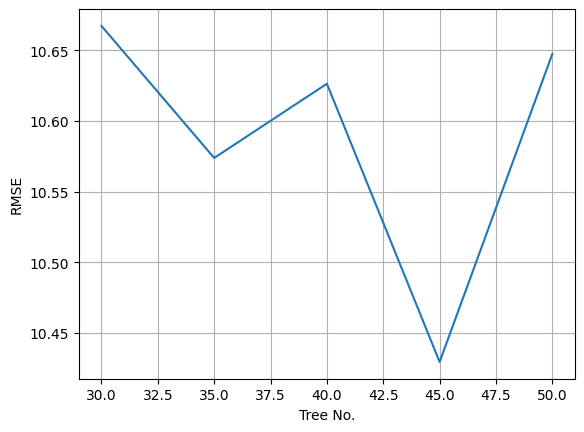

In [34]:

pickle.dump(rfModel, open('rfModel.p','wb'))
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()


In [35]:
print(f'RMSE with 45 trees: {rmse_results[3]}')

RMSE with 45 trees: 10.429471250730519


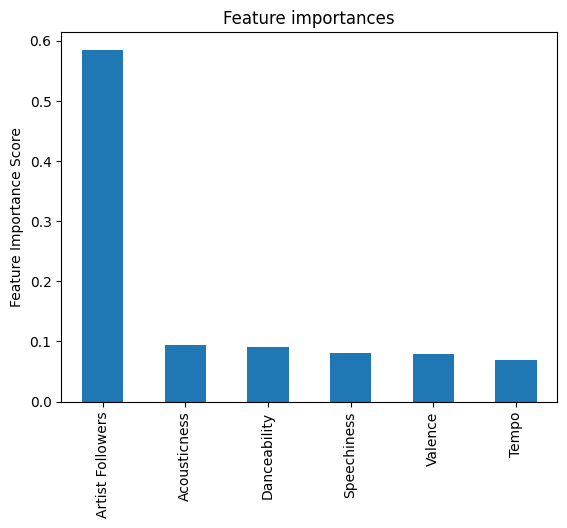

In [36]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;

In [37]:
drop_drop_art = more_drops.drop(columns = 'Artist Followers')
drop_drop_dan = more_drops.drop(columns = 'Danceability')
drop_drop_spe = more_drops.drop(columns = 'Speechiness')
drop_drop_aco = more_drops.drop(columns = 'Acousticness')
drop_drop_tem = more_drops.drop(columns = 'Tempo')
drop_drop_val = more_drops.drop(columns = 'Valence')

In [38]:
more_alternatives = [drop_drop_art,drop_drop_dan,drop_drop_spe,drop_drop_aco,drop_drop_tem,drop_drop_val]

In [39]:
# Repeating the process of testing for acceptable features to drop.
num_trees = 45
cv_loops = 100
rmse_results = np.zeros(1)
std_results = np.zeros(1)


for n in more_alternatives:
  X = n.drop('Popularity', axis = 1)
  y = n['Popularity']
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=45 )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  rmse_results[0] = rmse_cv.mean()
  print(f'rmse = {rmse_results[0]}')

rmse = 16.23580377982425
rmse = 10.588583868986634
rmse = 10.402043221040694
rmse = 10.460516367553653
rmse = 10.395617297924154
rmse = 10.495259329807176


In [40]:
more_drops.columns

Index(['Artist Followers', 'Popularity', 'Danceability', 'Speechiness',
       'Acousticness', 'Tempo', 'Valence'],
      dtype='object')

In [41]:
even_more_drops = more_drops.drop(columns = ['Speechiness', 'Tempo'])

In [42]:
X = even_more_drops.drop('Popularity', axis = 1)
y = even_more_drops['Popularity']

num_trees = range(40,51,1)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()

40  trees finished.
41  trees finished.
42  trees finished.
43  trees finished.
44  trees finished.
45  trees finished.
46  trees finished.
47  trees finished.
48  trees finished.
49  trees finished.
50  trees finished.


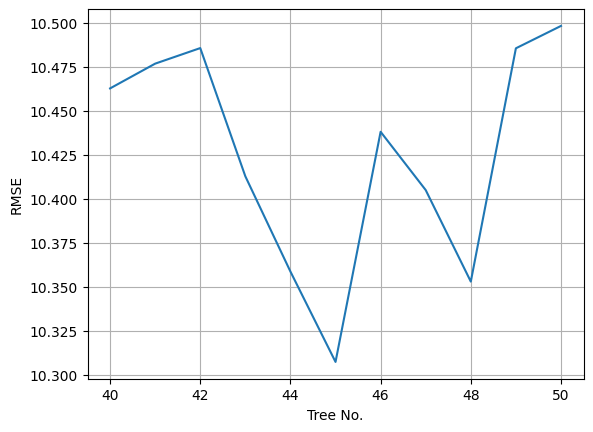

In [43]:
pickle.dump(rfModel, open('rfModel.p','wb'))
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()

In [44]:
print(f'RMSE with 45 trees: {rmse_results[5]}')

RMSE with 45 trees: 10.307263918445171


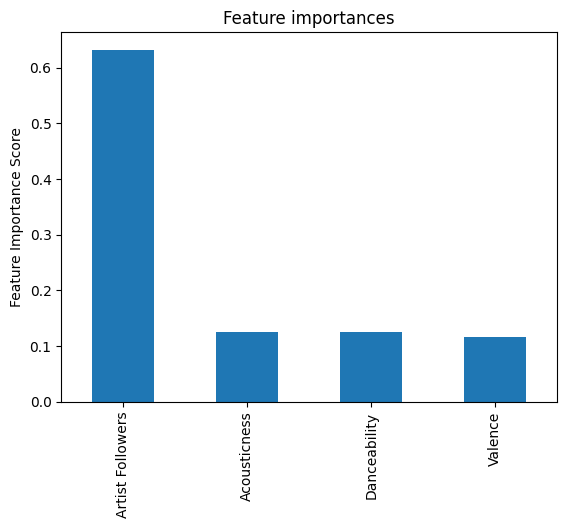

In [45]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;

In [46]:
X = even_more_drops.drop(columns = ['Popularity', 'Acousticness', 'Valence'])
y = even_more_drops['Popularity']

num_trees = range(40,51,1)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()

40  trees finished.
41  trees finished.
42  trees finished.
43  trees finished.
44  trees finished.
45  trees finished.
46  trees finished.
47  trees finished.
48  trees finished.
49  trees finished.
50  trees finished.


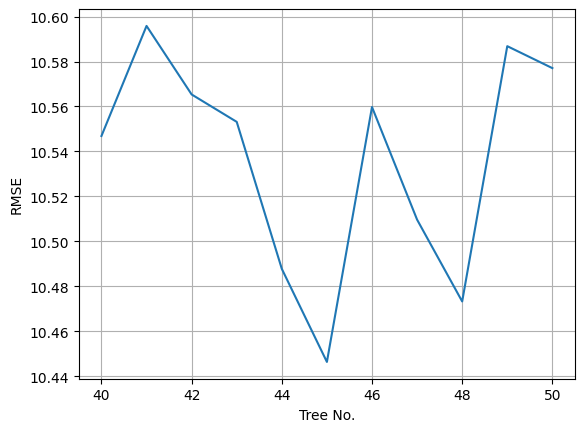

In [47]:
pickle.dump(rfModel, open('rfModel.p','wb'))
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()

In [48]:
print(f'RMSE with 45 trees: {rmse_results[6]}')

RMSE with 45 trees: 10.559757866307969


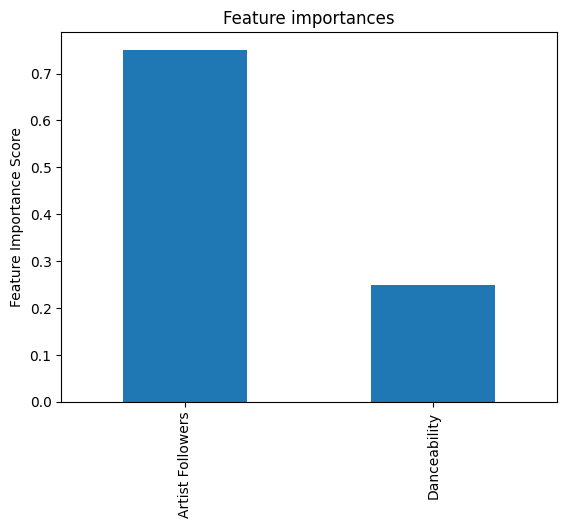

In [49]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;

In [50]:
even_more_drops.columns

Index(['Artist Followers', 'Popularity', 'Danceability', 'Acousticness',
       'Valence'],
      dtype='object')

In [51]:
no_fol = even_more_drops.drop(columns = 'Artist Followers')
no_dan = even_more_drops.drop(columns = 'Danceability')
no_aco = even_more_drops.drop(columns = 'Acousticness')
no_val = even_more_drops.drop(columns = 'Valence')

In [52]:
almost_done = [no_fol,no_dan,no_aco,no_val]

In [53]:
num_trees = 45
cv_loops = 100
rmse_results = np.zeros(1)
std_results = np.zeros(1)


for n in almost_done:
  X = n.drop('Popularity', axis = 1)
  y = n['Popularity']
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=45 )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  rmse_results[0] = rmse_cv.mean()
  print(f'rmse = {rmse_results[0]}')

rmse = 16.411406512024048
rmse = 10.386511206805444
rmse = 10.310017323965747
rmse = 10.30623331980236


In [54]:
mostly_drops = even_more_drops.drop(columns = 'Valence')

In [55]:
no_fol = mostly_drops.drop(columns = 'Artist Followers')
no_dan = mostly_drops.drop(columns = 'Danceability')
no_aco = mostly_drops.drop(columns = 'Acousticness')

In [56]:
last_check = [no_fol,no_dan,no_aco]

In [57]:
num_trees = 45
cv_loops = 100
rmse_results = np.zeros(1)
std_results = np.zeros(1)


for n in last_check:
  X = n.drop('Popularity', axis = 1)
  y = n['Popularity']
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=45 )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  rmse_results[0] = rmse_cv.mean()
  print(f'rmse = {rmse_results[0]}')

rmse = 16.633076741059746
rmse = 10.26865218917691
rmse = 10.446364416127796


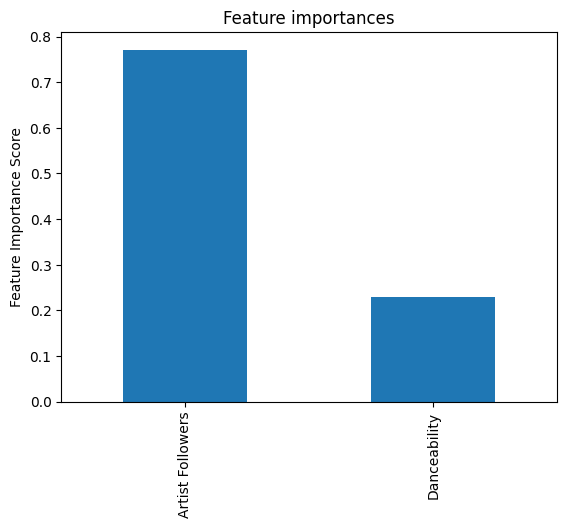

In [58]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;

## Data Visualization/Communication of Results


RMSE = ~ 10

Most Important Feature: Artist Followers